# Importing Libraries

In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Feature Extraction


In [85]:

def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        return mfccs_scaled
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [87]:
# Directories and corresponding labels (two classes only)
directories = {
    '/content/drive/MyDrive/baby_sounds/discomfort': 'discomfort',
    '/content/drive/MyDrive/baby_sounds/hungry': 'hungry'
}

features = []
labels = []

In [88]:
# Extracting the features and labels from audio files
for directory, label in directories.items():
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):  # Check for WAV files
            file_path = os.path.join(directory, filename)
            mfccs = extract_features(file_path)
            if mfccs is not None:
                features.append(mfccs)
                labels.append(label)

print(f"Number of features extracted: {len(features)}")
print(f"Number of labels: {len(labels)}")

Number of features extracted: 490
Number of labels: 490


# Label Encoding and Data Splitting

In [89]:
# Converting labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

X = np.array(features)

if X.size == 0 or y.size == 0:
    raise ValueError("No data found. Please check your dataset and feature extraction.")

In [90]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using SMOTE And Training Model

In [91]:
#SMOTE for resampling
smote = SMOTE(random_state=42)

In [92]:

#SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [93]:
#Training the SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_resampled, y_resampled)


SVC(kernel='linear', probability=True)

# Classification Report

In [94]:
# Making predictions
y_pred = model.predict(X_test)

In [95]:
# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

              precision    recall  f1-score   support

  discomfort       0.39      0.67      0.49        21
      hungry       0.89      0.71      0.79        77

    accuracy                           0.70        98
   macro avg       0.64      0.69      0.64        98
weighted avg       0.78      0.70      0.73        98



# Confusion Matrix

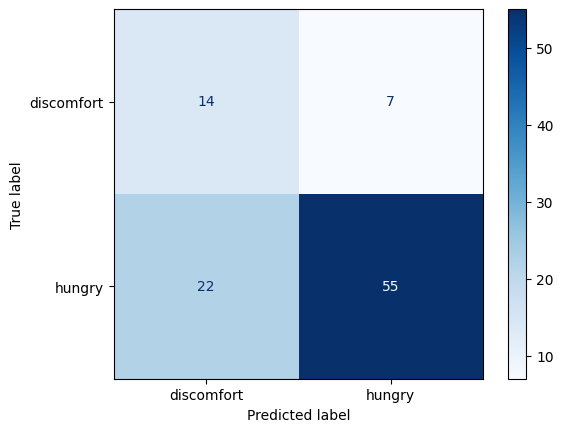

In [96]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Saving Model 

In [97]:

# Save the model
joblib.dump(model, 'cry_recognition_model.pkl')

['cry_recognition_model.pkl']